<a href="https://colab.research.google.com/github/AugustoGuimaraesUFRJ/Machine-Learning/blob/main/Tarefa_1_Regress%C3%A3o_Linear_Augusto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AUGUSTO GUIMARÃES RODRIGUES DE LIMA DRE: 119025393

In [1193]:
# Carregando Bibliotecas
import pandas as pd
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from six import StringIO
import pydotplus
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

## DATASET

In [1194]:
dataset = pd.read_csv("data-t1.csv")

In [1195]:
# 5 primeiras linhas do dataset
dataset.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [1196]:
#  Informações das colunas
#  Nome, quantidade de valores não-nulos e tipo
print("nome X quantidade de valores não-nulos X tipo: ")
dataset.info()

nome X quantidade de valores não-nulos X tipo: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non

In [1197]:
# Quantidade de linhas X colunas
print("quantidade de instancias X atributos: ")
dataset.shape

quantidade de instancias X atributos: 


(569, 33)

In [1198]:
# Elimina a coluna com valores NaN
dataset.dropna(axis=1,inplace=True)

In [1199]:
# Removendo coluna ID
dataset.drop(dataset.columns[0], axis=1, inplace=True)

In [1200]:
# Removendo coluna diagnosis pois é um atributo categorico
dataset.drop(dataset.columns[0], axis=1, inplace=True)

In [1201]:
# Verifica linhas repetidas
dataset.drop_duplicates()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [1202]:
# Remove atributos com baixa variância
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.01) # Remove as colunas cujos os valores são 99% iguais
var_thres.fit(dataset)
var_thres.get_support()
dataset.columns[var_thres.get_support()]
constant_columns = [column for column in dataset.columns
                    if column not in dataset.columns[var_thres.get_support()]]
dp=dataset.drop(constant_columns,axis=1)
dp

,radius_mean,texture_mean,perimeter_mean,area_mean,radius_se,texture_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst
0,17.99,10.38,122.80,1001.0,1.0950,0.9053,8.589,153.40,25.380,17.33,184.60,2019.0,0.66560,0.7119
1,20.57,17.77,132.90,1326.0,0.5435,0.7339,3.398,74.08,24.990,23.41,158.80,1956.0,0.18660,0.2416
2,19.69,21.25,130.00,1203.0,0.7456,0.7869,4.585,94.03,23.570,25.53,152.50,1709.0,0.42450,0.4504
3,11.42,20.38,77.58,386.1,0.4956,1.1560,3.445,27.23,14.910,26.50,98.87,567.7,0.86630,0.6869
4,20.29,14.34,135.10,1297.0,0.7572,0.7813,5.438,94.44,22.540,16.67,152.20,1575.0,0.20500,0.4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,1.1760,1.2560,7.673,158.70,25.450,26.40,166.10,2027.0,0.21130,0.4107
565,20.13,28.25,131.20,1261.0,0.7655,2.4630,5.203,99.04,23.690,38.25,155.00,1731.0,0.19220,0.3215
566,16.60,28.08,108.30,858.1,0.4564,1.0750,3.425,48.55,18.980,34.12,126.70,1124.0,0.30940,0.3403
567,20.60,29.33,140.10,1265.0,0.7260,1.5950,5.772,86.22,25.740,39.42,184.60,1821.0,0.86810,0.9387


## Correlação

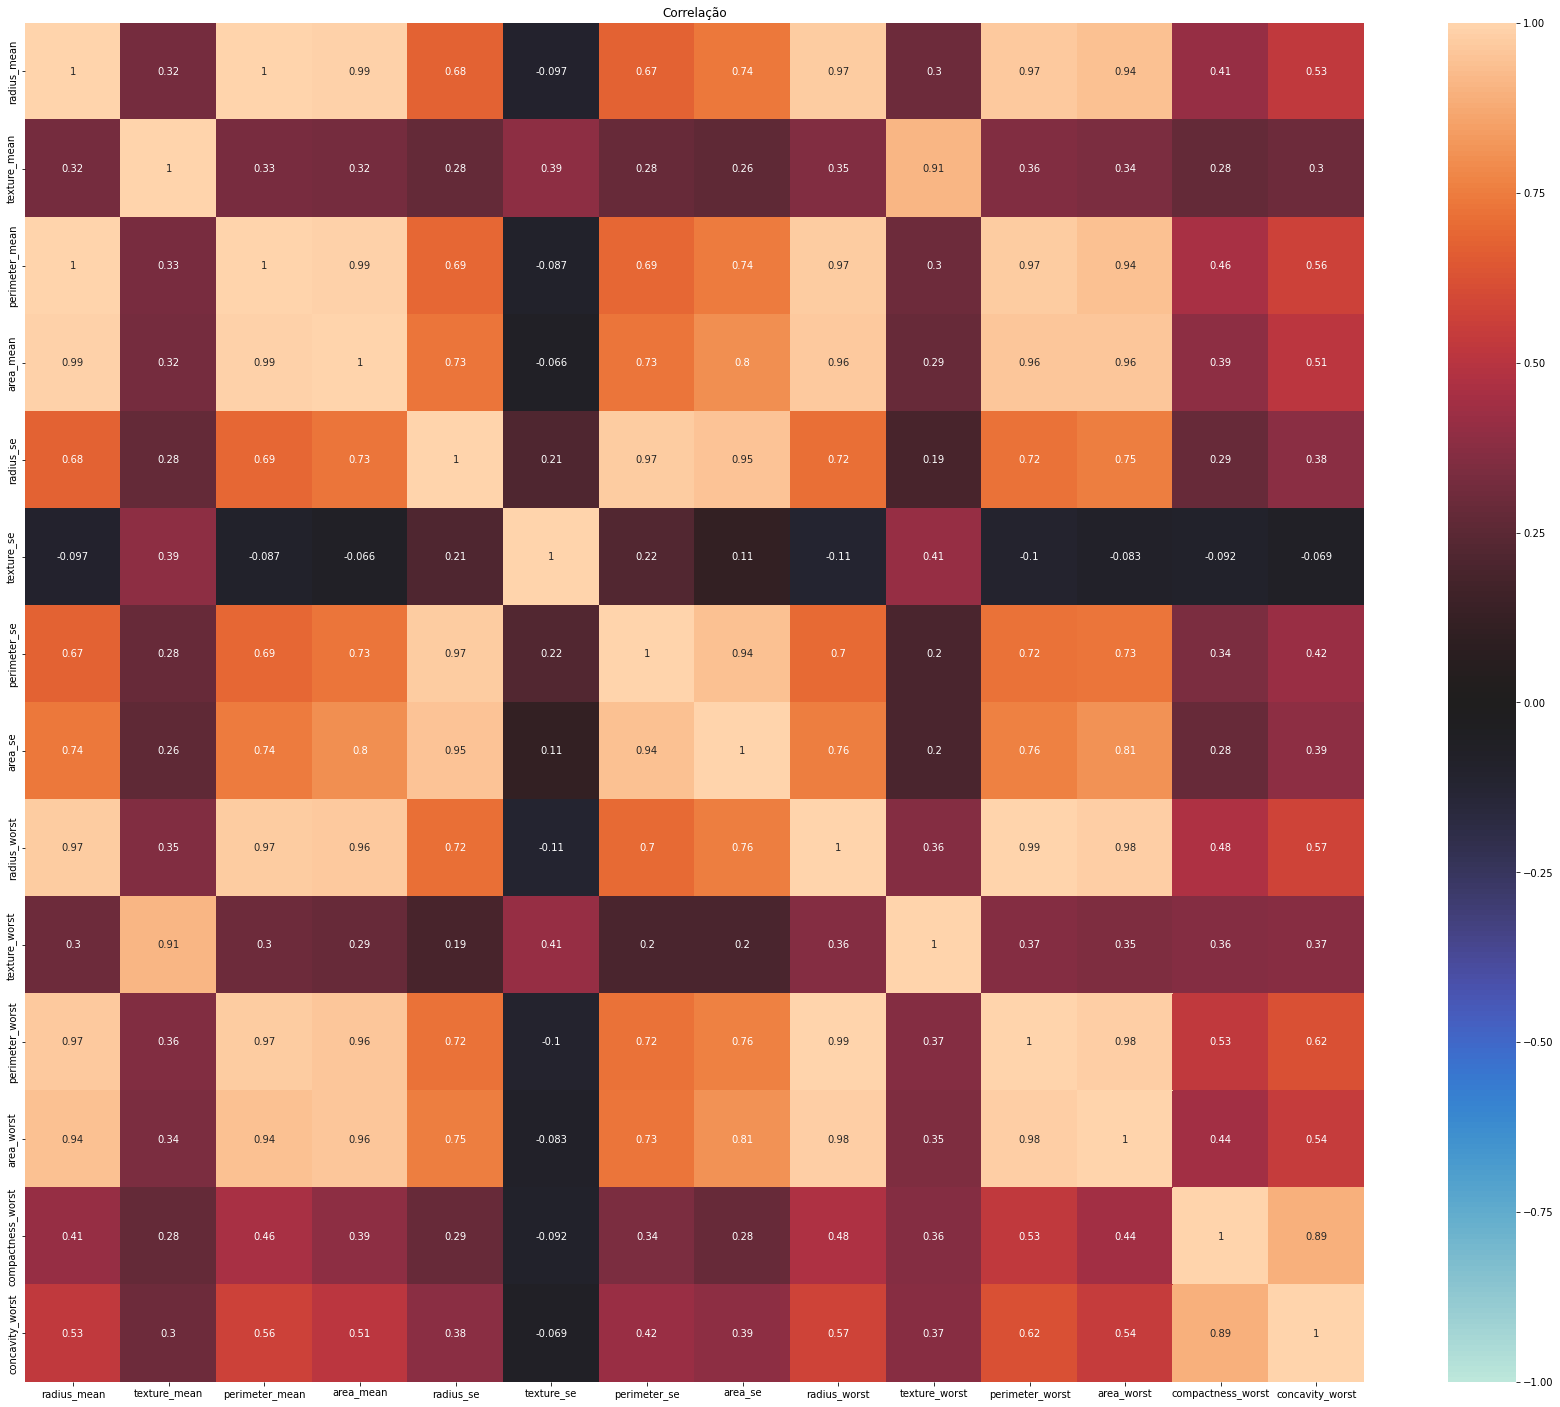

In [1203]:
# Correlação
features = dp.columns
plt.figure(figsize=[30,25])
plt.title('Correlação')
sns.heatmap(dp[features].corr(), vmin=-1, vmax=1, center=0, annot=True)  
plt.show()

## Regressão Linear

In [1204]:
# Atributos com forte correlação entre si
X1 = dp[['perimeter_mean','area_mean']]
Y1 = dp[['radius_mean']]


In [1205]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.3)

In [1206]:
# Realizando a Regressão Linear
regressaoLinear = LinearRegression()
regressao = regressaoLinear.fit(X_train, y_train)
# Prevendo
y_pred = regressao.predict(X_test)
# Printando o score
score = regressao.score(X_test,y_test)
print('Score: ',score)
print('Erro quadratico médio: ', mean_squared_error(y_test, y_pred))


Score:  0.9950534663295014
Erro quadratico médio:  0.06972478780111226


Score:  0.9948110658496647
Erro quadrático médio:  0.04913050157756998


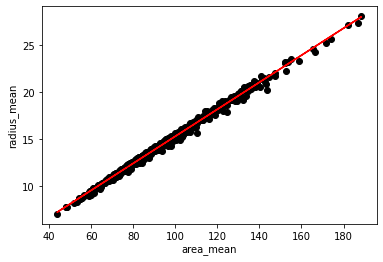

In [1207]:
X2 = dp[['perimeter_mean']]
Y2 = dp[['radius_mean']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.3)
regressao = LinearRegression()
regressao.fit(X2_train, y2_train)
yPrevisao = regressao.predict(X2_test)
theta0 = regressao.intercept_
theta1 = regressao.coef_
print("Score: ", regressao.score(X2_test, y2_test))
print("Erro quadrático médio: ", mean_squared_error(y2_test, yPrevisao))
plt.scatter(X2, Y2,marker='o',color='black')   
plt.plot(X2_train, theta0 + theta1*X2_train,  color='red')
plt.ylabel('radius_mean')
plt.xlabel('area_mean')
plt.show() 
print()

Se duas variavéis tem uma forte correlação, é possivel trabalhar com apenas uma delas sem alterar significativamente o modelo de previsão

In [1208]:
X3 = dp[['texture_mean']]
Y3 = dp[['radius_mean']]

Score:  0.12293250560421676
Erro quadrático médio:  10.296849510536305


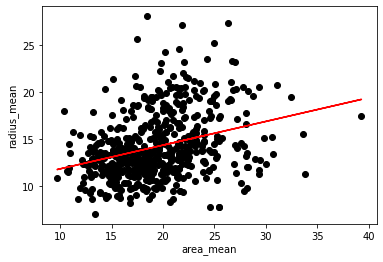

In [1209]:
# Atributos com baixa correlação
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size = 0.3)
regressao = LinearRegression()
regressao.fit(X3_train, y3_train)
yPrevisao = regressao.predict(X3_test)
theta0 = regressao.intercept_
theta1 = regressao.coef_
print("Score: ", regressao.score(X3_test, y3_test))
print("Erro quadrático médio: ", mean_squared_error(y3_test, yPrevisao))
plt.scatter(X3, Y3,marker='o',color='black')   
plt.plot(X3_train, theta0 + theta1*X3_train,  color='red')
plt.ylabel('radius_mean')
plt.xlabel('area_mean')
plt.show() 
print()

## Normalização

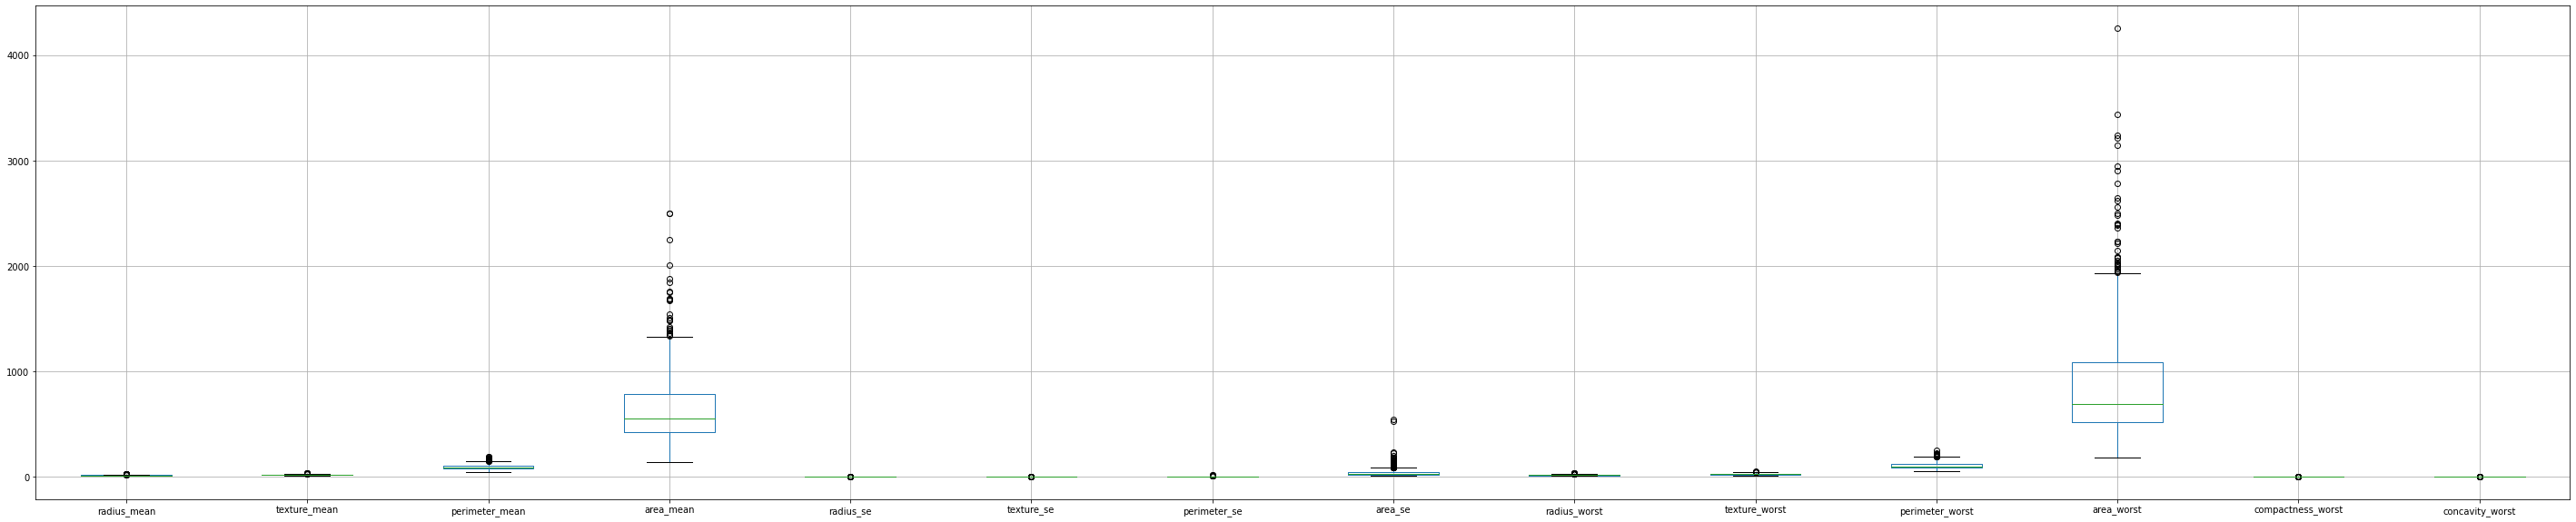

In [1210]:
# Analisando a Variação de Dados do dataset
dp.boxplot(figsize=(50,10))

In [1211]:
# Vamos normalizar os dados
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

dp = mean_norm(dp)

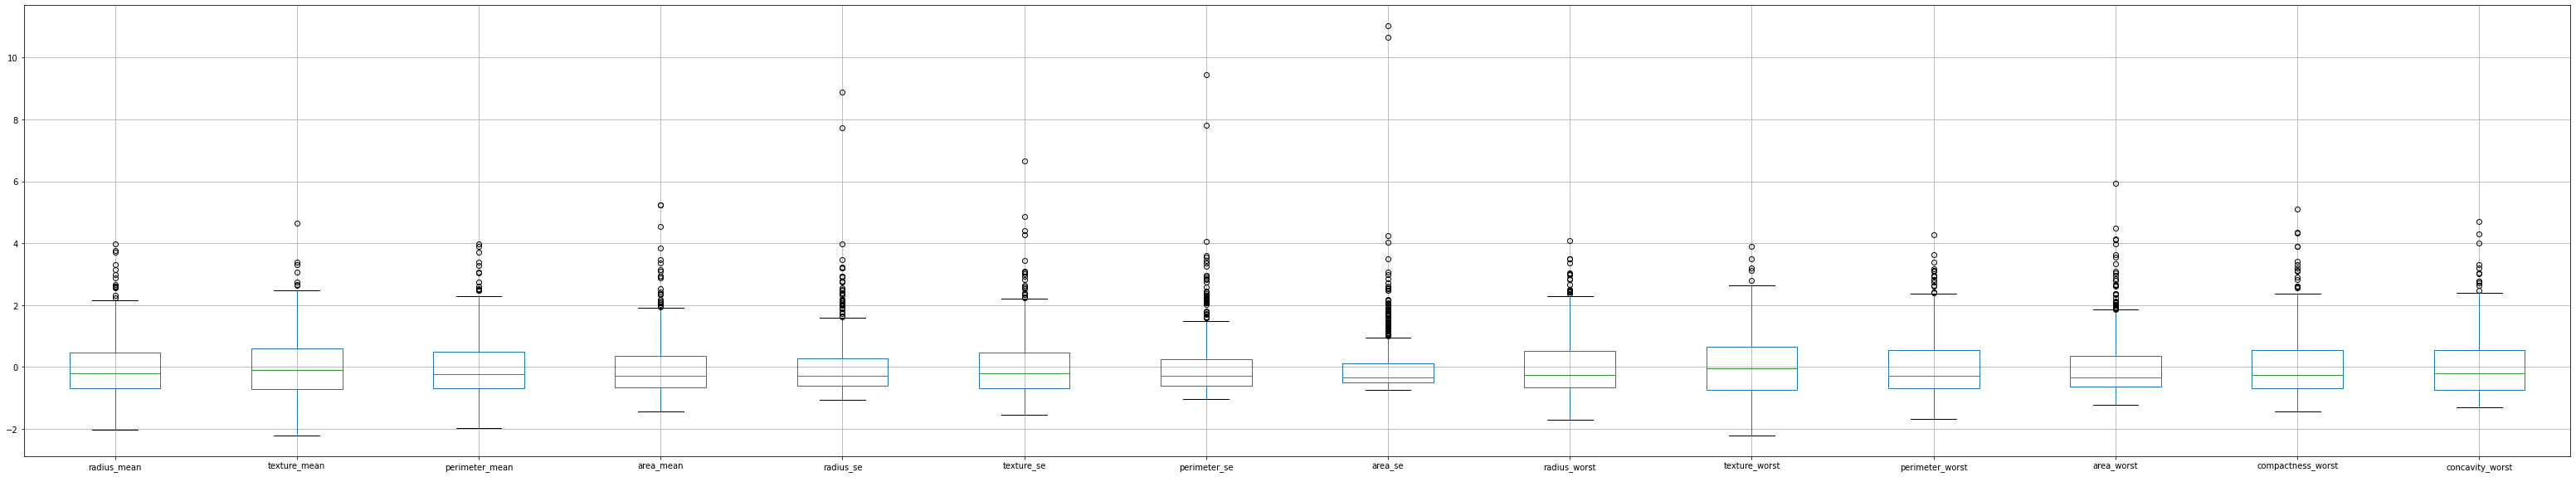

In [1212]:
dp.boxplot(figsize=(55,10))

É possível ver que no dataset há muitos outliers. Vamos remove-los!

## Removendo OUTLIERS

In [1213]:
# Método de John Tukey
from numpy import percentile
total=0
for column in dp.columns:
    q25, q75 = percentile(dp[column], 25), percentile(dp[column], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identifica outliers
    outliers = [x for x in dp[column] if x < lower or x > upper]
    print("Coluna: ",column)
    print('Outliers encontrados: %d' % len(outliers))
    print()
    total+=len(outliers)
    # remove outliers
    outliers_removed = [x for x in dp[column] if x >= lower and x <= upper]
    dp = dp[dp[column] < upper]
print("Total de outliers: ",total)

Coluna:  radius_mean
Outliers encontrados: 14

Coluna:  texture_mean
Outliers encontrados: 7

Coluna:  perimeter_mean
Outliers encontrados: 2

Coluna:  area_mean
Outliers encontrados: 33

Coluna:  radius_se
Outliers encontrados: 32

Coluna:  texture_se
Outliers encontrados: 16

Coluna:  perimeter_se
Outliers encontrados: 11

Coluna:  area_se
Outliers encontrados: 31

Coluna:  radius_worst
Outliers encontrados: 6

Coluna:  texture_worst
Outliers encontrados: 2

Coluna:  perimeter_worst
Outliers encontrados: 3

Coluna:  area_worst
Outliers encontrados: 9

Coluna:  compactness_worst
Outliers encontrados: 16

Coluna:  concavity_worst
Outliers encontrados: 10

Total de outliers:  192


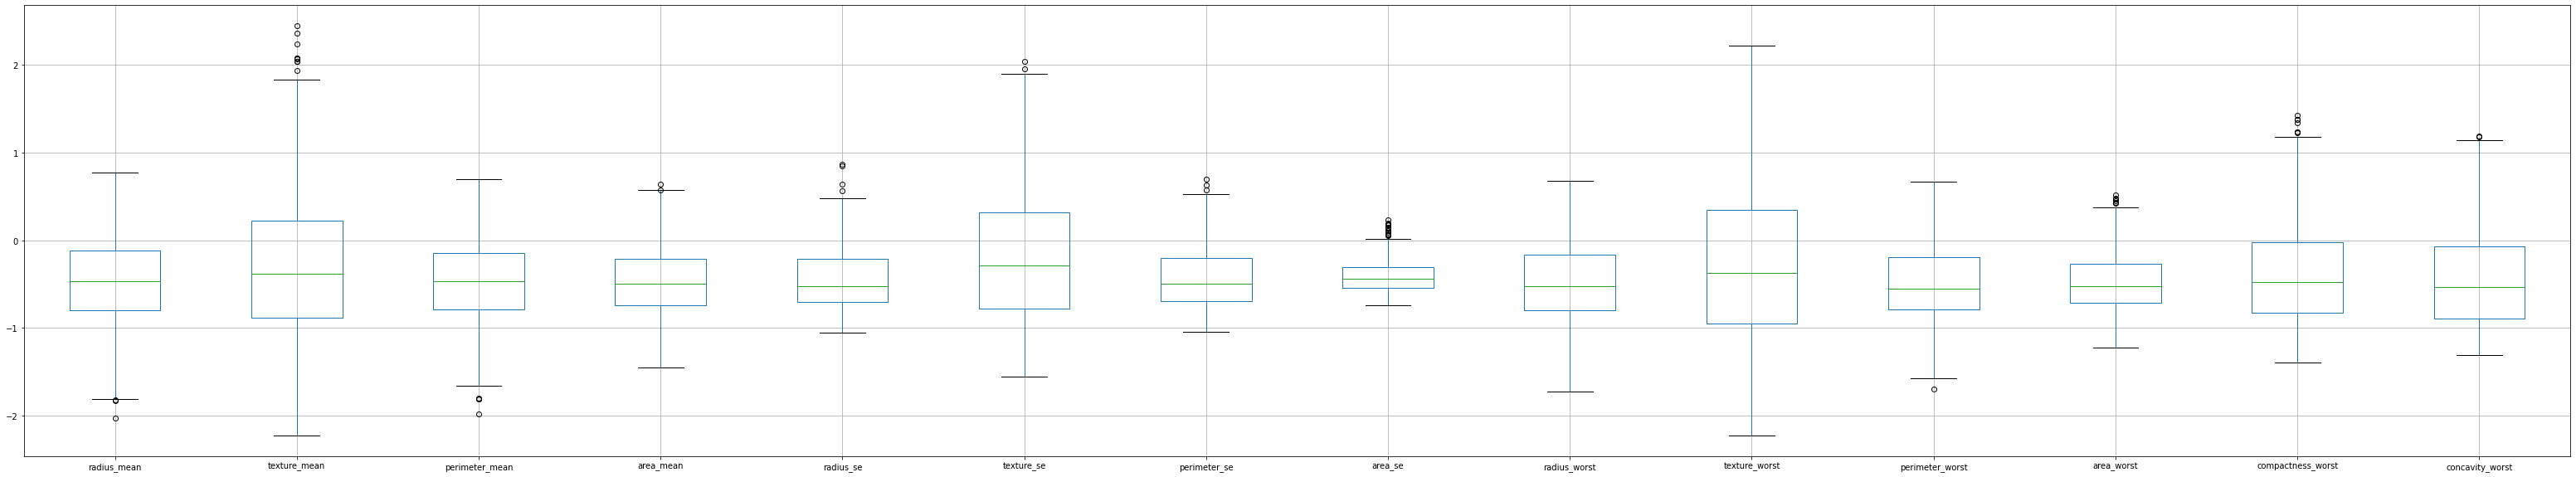

In [1214]:
# Analisando a Variação de Dados do dataset
dp.boxplot(figsize=(55,10))

In [1215]:
X4 = dp[['perimeter_mean','area_mean']]
Y4 = dp[['radius_mean']]
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, Y4, test_size = 0.3)
# Realizando a Regressão Linear
regressaoLinear = LinearRegression()
regressao = regressaoLinear.fit(X4_train, y4_train)
# Prevendo
y4_pred = regressao.predict(X4_test)
# Printando o score
score = regressao.score(X4_test,y4_test)
print('Score: ',score)
print('Erro quadratico médio: ', mean_squared_error(y4_test, y4_pred))

Score:  0.995573582425156
Erro quadratico médio:  0.0010466012418887454


Score:  0.9927890946880565
Erro quadrático médio:  0.0018874460941082937


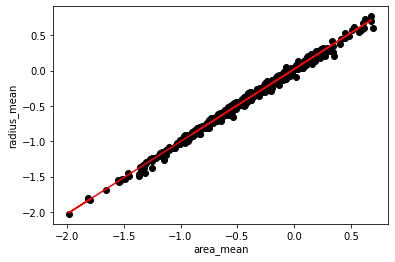

In [1216]:
X5 = dp[['perimeter_mean']]
Y5 = dp[['radius_mean']]
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, Y5, test_size = 0.3)
regressao = LinearRegression()
regressao.fit(X5_train, y5_train)
yPrevisao = regressao.predict(X5_test)
teta0 = regressao.intercept_
teta1 = regressao.coef_
print("Score: ", regressao.score(X5_test, y5_test))
print("Erro quadrático médio: ", mean_squared_error(y5_test, yPrevisao))
plt.scatter(X5, Y5,marker='o',color='black')   
plt.plot(X5_train, teta0 + teta1*X5_train,  color='red')
plt.ylabel('radius_mean')
plt.xlabel('area_mean')
plt.show() 
print()

Diminui o erro quadrático médio